# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = \langle 2A^T(Ax - y), dx \rangle $$
$$ \nabla f(x) = 2A^T(Ax - y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax - y) = 0 $$
$$ x = (A^TA)^{-1}A^Ty $$

### 2.1 Реализация прямого решения

In [2]:
import numpy as np
import matplotlib.pyplot as plt

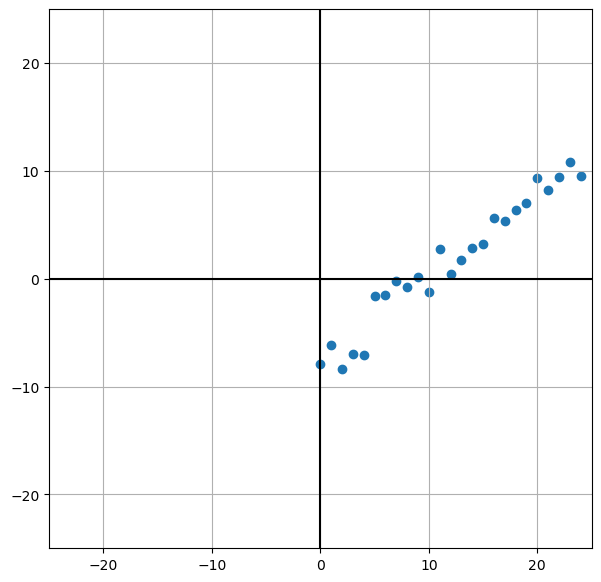

In [3]:
# ваши параметры по вариантам
n = 8
a_orig = (-1)**n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n * (-1)**(n+1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = n # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)
plt.show()

In [4]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-7.90879528, -6.10871727, -8.34697031, -6.98634953, -7.09649157,
        -1.5901657 , -1.47216383, -0.19544372, -0.80517236,  0.1764211 ,
        -1.18342715,  2.71636361,  0.4766732 ,  1.73596453,  2.82164143,
         3.20838473,  5.65954811,  5.369211  ,  6.33433897,  6.99136377,
         9.34686857,  8.1930472 ,  9.42575179, 10.82405142,  9.5540099 ]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - Вектор единиц добавлен для учета свободного члена (intercept) в линейной модели y = a*x + b. Это позволяет учитывать смещение линии регрессии по вертикали.

In [5]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
print("Аналитическое решение:", a_b_analytical)

Аналитическое решение: [ 0.78340023 -7.75520505]


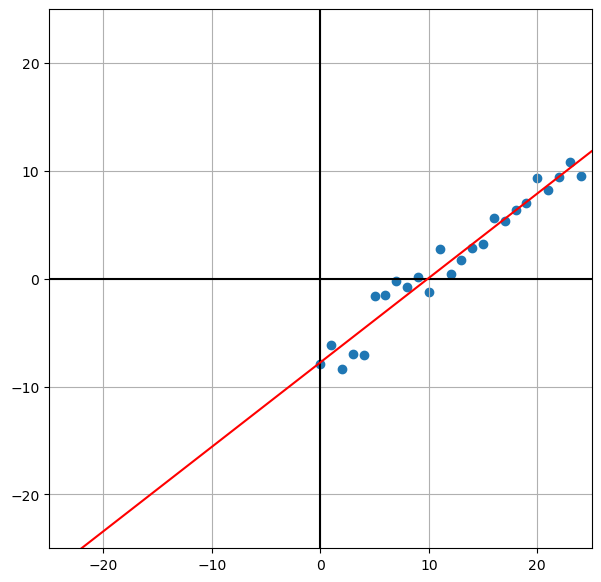

In [6]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1]
ax.plot(x_line, y_line, color='red')
plt.show()

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 1000 шагов.<br> Начинаем с параметров 0, 0

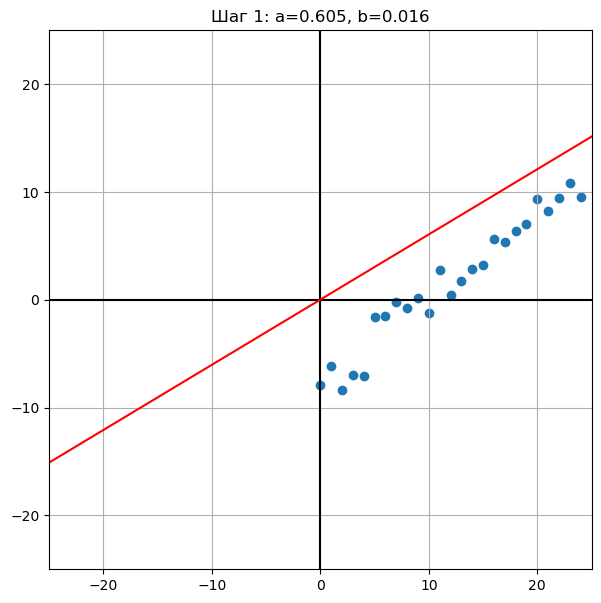

Шаг 1: a=0.6048398436725299, b=0.016455977041615062


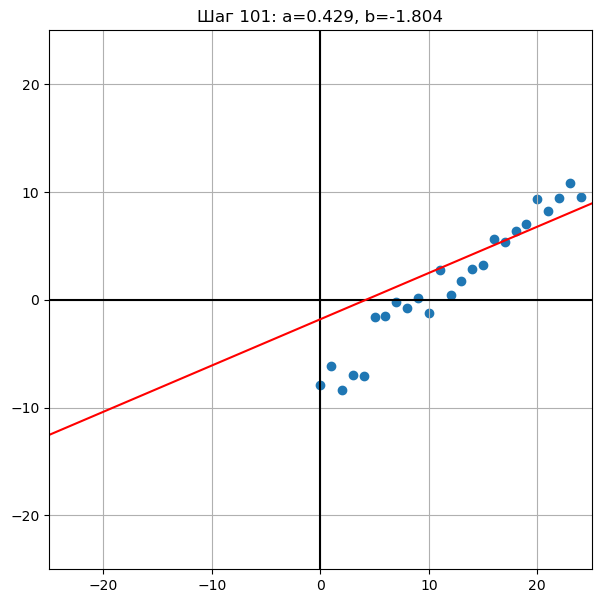

Шаг 101: a=0.42933427225431736, b=-1.8040417512635996


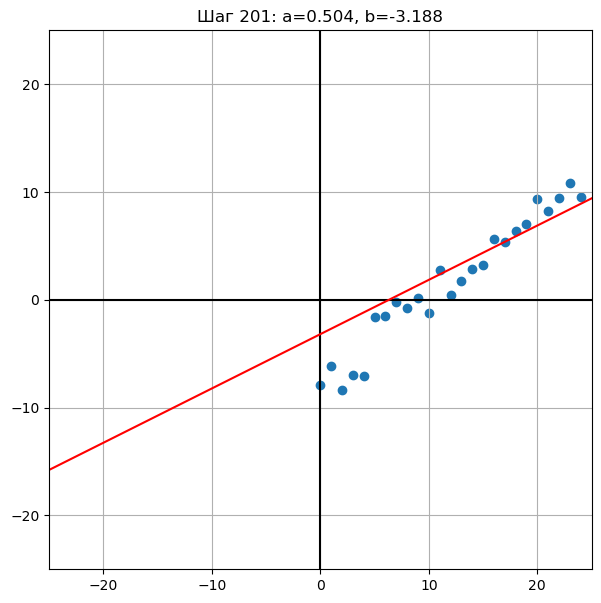

Шаг 201: a=0.5038116990337645, b=-3.1883841667152284


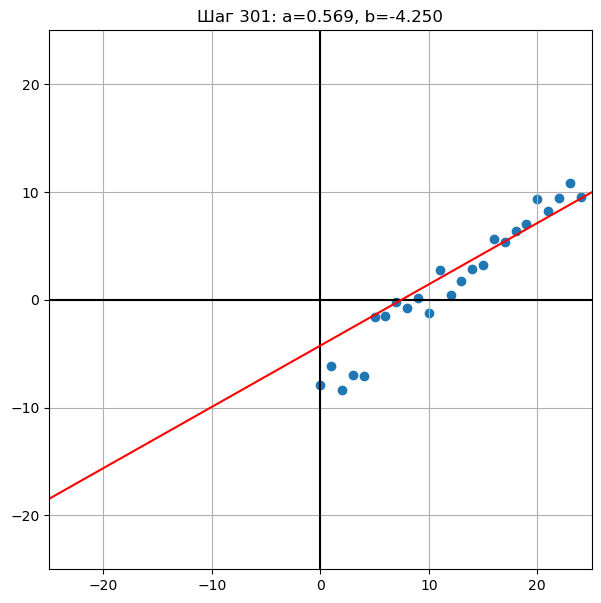

Шаг 301: a=0.5685417961243018, b=-4.250352700340247


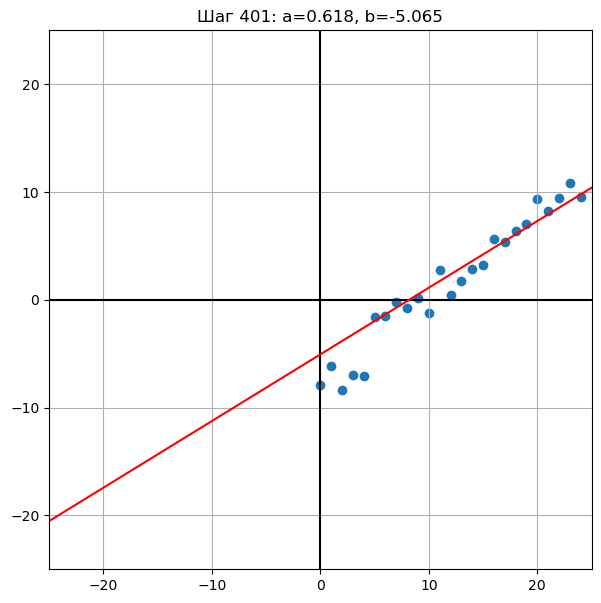

Шаг 401: a=0.6184938635742551, b=-5.06535832166621


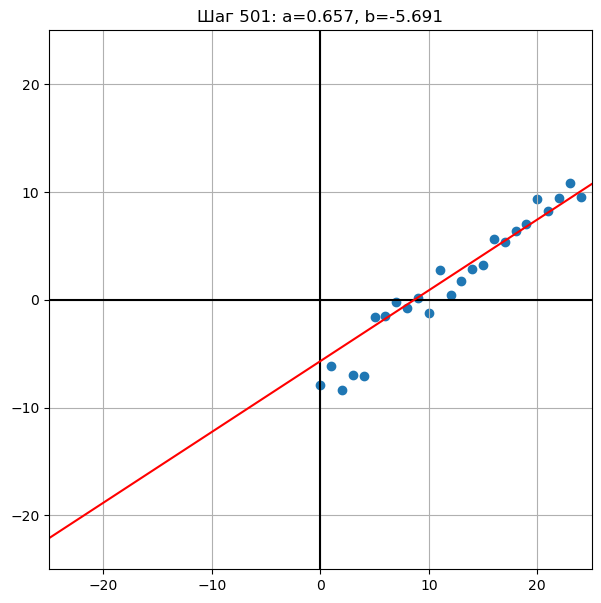

Шаг 501: a=0.6568401880028765, b=-5.690845037609392


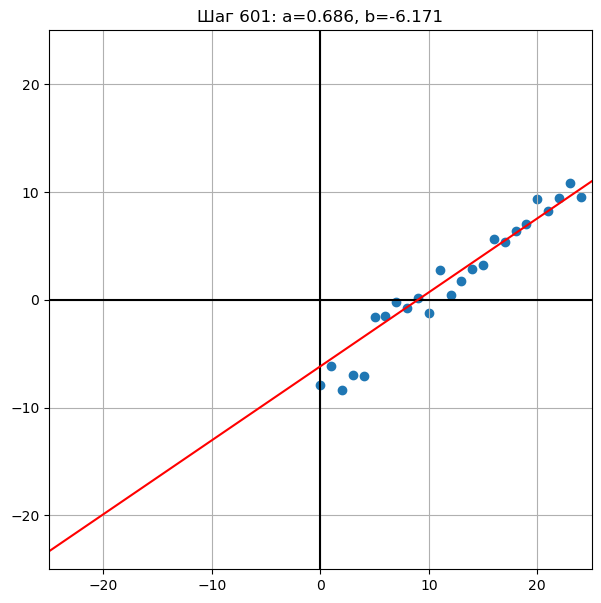

Шаг 601: a=0.6862699635525698, b=-6.170883437404438


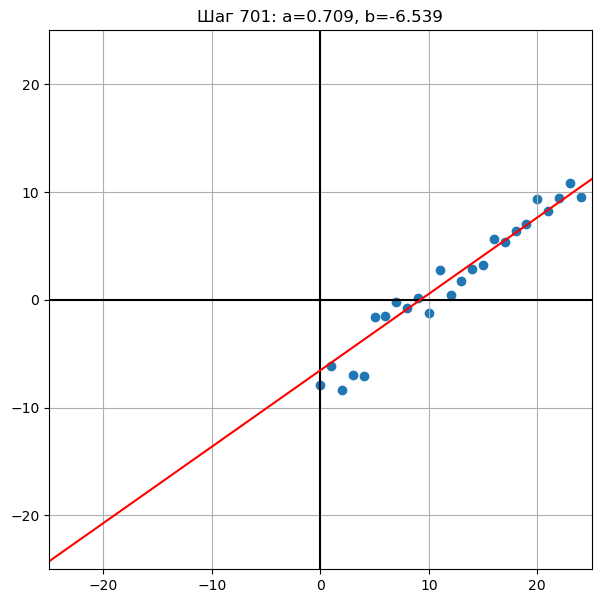

Шаг 701: a=0.7088562643943799, b=-6.539295538690211


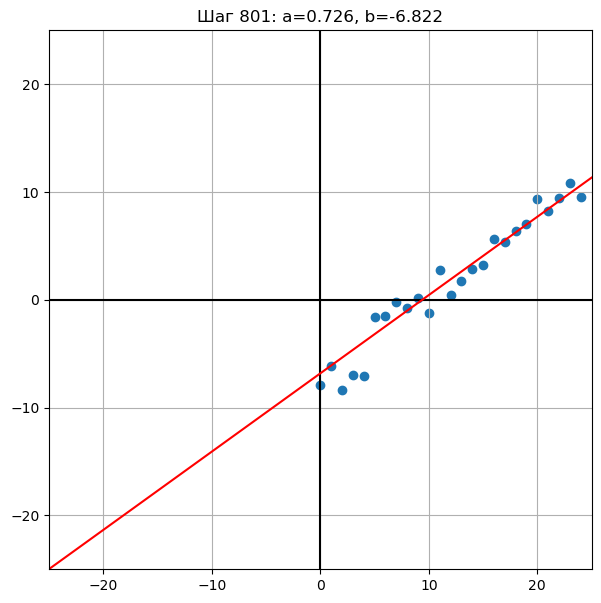

Шаг 801: a=0.726190433495848, b=-6.822038495735876


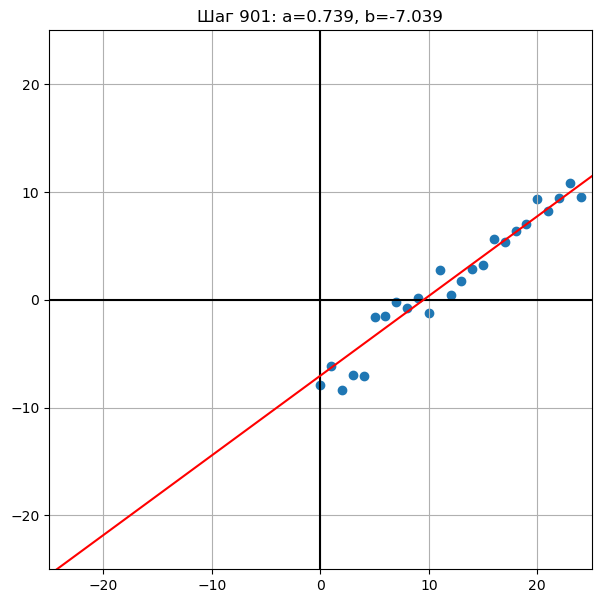

Шаг 901: a=0.739493781076852, b=-7.039033484466408


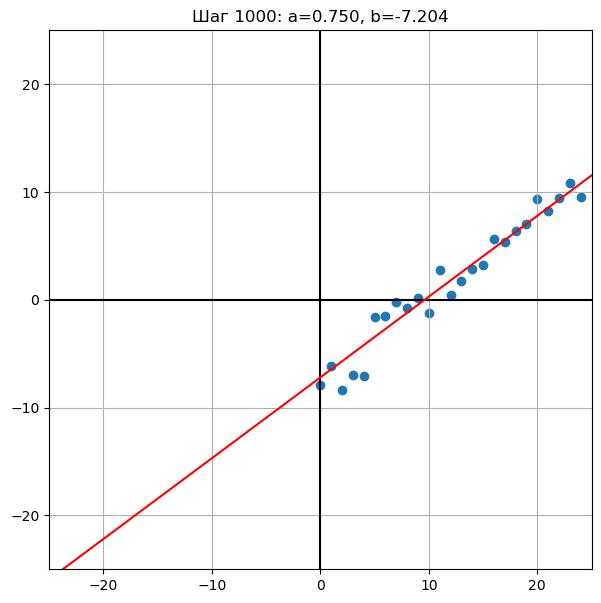

Шаг 1000: a=0.7496143180763919, b=-7.204112672141364


In [7]:
alpha = 0.0002  # Скорость обучения
iterations = 1000
a_b_grad = np.array([0., 0.])  # Начальные параметры

for i in range(iterations):
    # Вычисляем градиент
    grad = 2 * A.T @ (A @ a_b_grad - y)
    a_b_grad -= alpha * grad
    
    # рисуем результат текущего шага
    if i % 100 == 0 or i == 999:

        #  - изначальные данные
        f, ax = plt.subplots(figsize=(7, 7))

        plt.scatter(A[:, 0], y)
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axvline(0, color='black')
        ax.axhline(0, color='black')
        ax.grid(True)

        # - линия которая обучилась
        x_line = np.array([-25,25])
        y_line = a_b_grad[0] * x_line + a_b_grad[1]
        ax.plot(x_line, y_line, color='red')

        ax.set_title(f'Шаг {i+1}: a={a_b_grad[0]:.3f}, b={a_b_grad[1]:.3f}')
        plt.show()
        
        print(f"Шаг {i+1}: a={a_b_grad[0]}, b={a_b_grad[1]}")